In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from numpy.linalg import inv
import seaborn as sns
import matplotlib.lines as lns

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# read Data Q1&2.csv

df = pd.read_csv('Data Q1&2.csv', parse_dates = ['Date'], index_col = 'Date')

In [3]:
#get a list of the stocks

stocks = df.columns 

In [4]:
def get_monthly_simple_return(df):
    """
    This function computes monthly returns on an entire period. 
    
    """
    df_monthly_returns = df.pct_change()
    # skip first row with NA 
    df_monthly_returns = df_monthly_returns[1:]
    return df_monthly_returns 

returns = get_monthly_simple_return(df)

In [5]:
returns

,Microsoft,IBM,Johnson&Johnson,Walmart,JP Morgan
Date,,,,,
2000-02-01,-0.086845,-0.084632,-0.163399,-0.109589,-0.013168
2000-03-01,0.188811,0.152068,-0.024306,0.158974,0.094976
2000-04-01,-0.343529,-0.058078,0.174377,-0.019912,-0.172760
2000-05-01,-0.103047,-0.037556,0.084848,0.040632,0.035529
2000-06-01,0.278721,0.020967,0.138268,0.000000,-0.074895
...,...,...,...,...,...
2020-08-01,0.100093,0.003010,0.052484,0.073029,0.036734
2020-09-01,-0.067397,-0.013300,-0.029529,0.007634,-0.039126
2020-10-01,-0.037370,-0.082272,-0.079057,-0.008291,0.018386


## EX1 A

In [6]:
def get_cumul_return(returns):
    """ 
    this function computes cumulative returns from a series of return
    """
    df_cum_monthly_returns = ((1 + returns).cumprod() - 1)*100 
    return df_cum_monthly_returns 

cumulative_returns = get_cumul_return(returns)
cumulative_returns

,Microsoft,IBM,Johnson&Johnson,Walmart,JP Morgan
Date,,,,,
2000-02-01,-8.684547,-8.463248,-16.339869,-10.958904,-1.316813
2000-03-01,8.556833,5.456566,-18.373275,3.196347,8.055768
2000-04-01,-28.735632,-0.668152,-4.139434,1.141553,-10.611933
2000-05-01,-36.079183,-4.398668,3.994190,5.251142,-7.436096
2000-06-01,-18.263091,-2.394211,18.373275,5.251142,-14.368708
...,...,...,...,...,...
2020-08-01,360.853126,9.853009,256.508360,153.607317,86.255616
2020-09-01,329.793107,8.391983,245.981130,155.543386,78.968231
2020-10-01,313.731803,-0.525615,218.628905,153.424658,82.258712


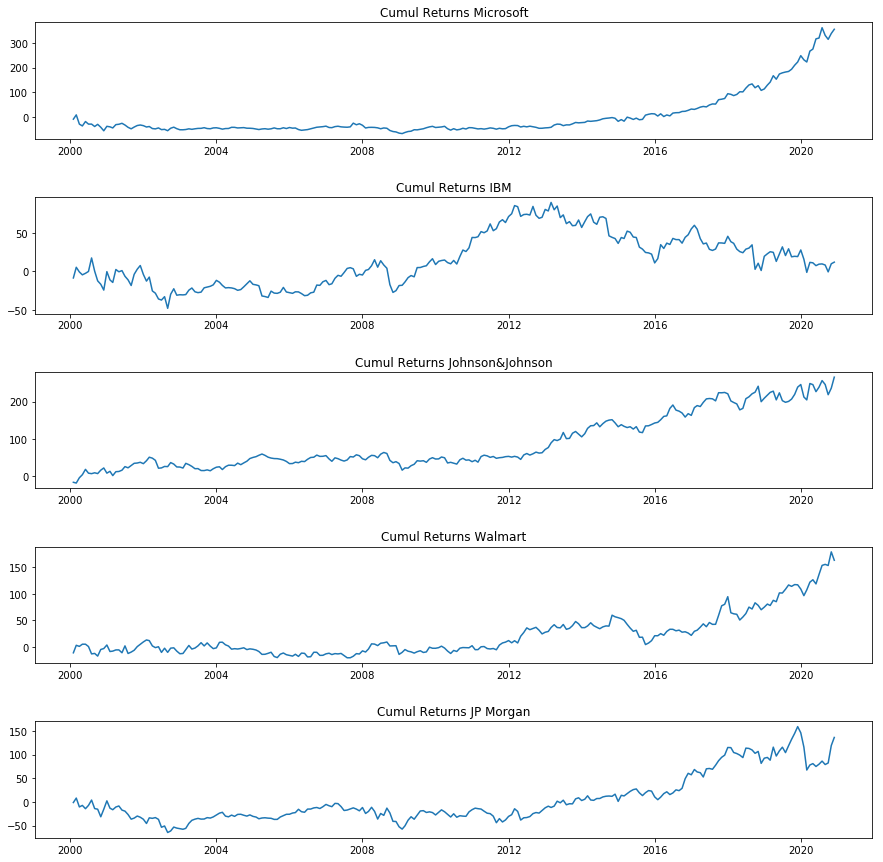

In [7]:
# this cell is used to plot the cumulative returns of each stock during the period.

fig, axs = plt.subplots(5,figsize=(15,15))
axs[0].plot(cumulative_returns.index, cumulative_returns['Microsoft'])
axs[0].set_title('Cumul Returns Microsoft')
axs[1].plot(cumulative_returns.index, cumulative_returns['IBM'])
axs[1].set_title('Cumul Returns IBM')
axs[2].plot(cumulative_returns.index, cumulative_returns['Johnson&Johnson'])
axs[2].set_title('Cumul Returns Johnson&Johnson')
axs[3].plot(cumulative_returns.index, cumulative_returns['Walmart'])
axs[3].set_title('Cumul Returns Walmart')
axs[4].plot(cumulative_returns.index, cumulative_returns['JP Morgan'])
axs[4].set_title('Cumul Returns JP Morgan')
plt.subplots_adjust(hspace = 0.5)
plt.show()

Microsofot cumulative returns does not show any major movement from 2000 to 2016 and then increase rapidly from 2016 to 2020. 

Cumulative returns from Johnson&johnson, Walmart and JP Morgan shows more or less the same pattern but volatility seems higher for those stocks ( small increases and decreases in the cumulative returns). Moreover, their cumulative returns in 2020 are all smaller than microsoft cumlative returns. 

IBM cumulative returns looks more volatile than the others and does not follow the same pattern. Indeed, after 2008, the stock cumulative returns increases sharply until 2013 and then decreases until 2020. 

## EX1 B

In [8]:
# T is the total number of periods in the returns serie and n is the number of period in a year (here 12).

def arithmetic_return_annualized(return_serie, T, n):
    """
    This function computes the annualized return from the formula given in the assignment,
    and use as inputs a series of returns, T which is the number of observations in the series and 
    n which is the number of period in a year (since we have monthly data)
    """
    return (sum(return_serie) / T) * n

#loop over the stocks list to compute the annualized return for each

annu_arithmetic_returns = [arithmetic_return_annualized(returns[i], 252, 12) for i in stocks]

def annualized_vol(return_serie, n):
    """
    This function computes the annualized volatility from the forumla given in the assignment,
    takes as input, a return series and number of period in a year
    """
    daily_vol = return_serie.std() #monthly std
    annualized = daily_vol * np.sqrt(n)
    return annualized

annu_volatility = [annualized_vol(returns[i], 12) for i in stocks]


# to compute the sharpe ratio we first sum the difference between the returns serie and risk free rate
# then we 


def annualized_sharpe_ratio(return_serie,T, n, rf):
    sharpe_ratio = (((sum(return_serie - rf))/T )) / return_serie.std()
    annualized = sharpe_ratio * np.sqrt(n)
    return annualized

annualized_sharpe = [annualized_sharpe_ratio(returns[i],252, 12, 0.005) for i in stocks]



def geometric_mean_annu(returns_serie, T, n):
    geo_mean = ((np.prod(returns_serie +1)) ** (1/T )) -1
    return (1+geo_mean)** n - 1

annu_geo = [geometric_mean_annu(returns[i], 252, 12) for i in stocks]


# create a dataframe from the results of these functions.

d = {'annualized_arithmetic_mean': annu_arithmetic_returns, 
    'annualized_geometric_mean': annu_geo,
    'annualized_volatility': annu_volatility,
    'annualized_sharpe_ratio': annualized_sharpe}

df1 = pd.DataFrame(d, index = stocks, columns = d.keys())
df1

,annualized_arithmetic_mean,annualized_geometric_mean,annualized_volatility,annualized_sharpe_ratio
Microsoft,0.112639,0.074759,0.285880,0.184962
IBM,0.036637,0.005472,0.251997,-0.091765
Johnson&Johnson,0.075643,0.063696,0.166097,0.095614
Walmart,0.063226,0.047178,0.185251,0.018700
JP Morgan,0.087076,0.041784,0.301579,0.090572


If we consider the annualized returns to evaluate stock performance, microsoft is by far the best performing asset with annualized return of 11.26%. Its sharpe ratio is also higher than the others.

The deviation between the annualized arithmetic returns and geometric returns is due to their differences in their computations. Indeed, Computations of the arithmetic returns correspond to the sum of monthly returns while for geometric returns we compute a product of the returns. 

## EX 1 C

sharpe ratio = (Rp - Rf) / vol

now if we leverage our investment by a factor c, the expected return on the portfolio as well as the volatility of the portfolio will be increase by the factor c. In the meantime since we leverage our investment it means that we borrow money so we have to reduce the numerator by a factor (c-1)*rf. Here follows the computations:


sharpe ratio = (c*Rp - (c-1)*Rf - Rf) / c*vol 

sharpe_ratio = c*(Rp-Rf) / c*vol 

sharpe_ratio = (Rp-Rf) / vol


## EX2

In [9]:
# create a new dataframe from the file Data Q1&2.csv but this thime using the data from 2000-1-1 to 2015-12-1 only

df = df[(df.index >= '2000-1-1') & (df.index <= '2015-12-1')]
df

,Microsoft,IBM,Johnson&Johnson,Walmart,JP Morgan
Date,,,,,
2000-01-01,48.937500,107.313576,43.031250,54.750000,53.791668
2000-02-01,44.687500,98.231361,36.000000,48.750000,53.083332
2000-03-01,53.125000,113.169212,35.125000,56.500000,58.125000
2000-04-01,34.875000,106.596558,41.250000,55.375000,48.083332
2000-05-01,31.281250,102.593208,44.750000,57.625000,49.791668
...,...,...,...,...,...
2015-08-01,43.520000,141.386230,93.980003,64.730003,64.099998
2015-09-01,44.259998,138.594650,93.349998,64.839996,60.970001
2015-10-01,52.639999,133.919693,101.029999,57.240002,64.250000


In [10]:
returns = get_monthly_simple_return(df)
returns

,Microsoft,IBM,Johnson&Johnson,Walmart,JP Morgan
Date,,,,,
2000-02-01,-0.086845,-0.084632,-0.163399,-0.109589,-0.013168
2000-03-01,0.188811,0.152068,-0.024306,0.158974,0.094976
2000-04-01,-0.343529,-0.058078,0.174377,-0.019912,-0.172760
2000-05-01,-0.103047,-0.037556,0.084848,0.040632,0.035529
2000-06-01,0.278721,0.020967,0.138268,0.000000,-0.074895
...,...,...,...,...,...
2015-08-01,-0.068094,-0.087042,-0.062169,-0.100722,-0.064643
2015-09-01,0.017004,-0.019744,-0.006704,0.001699,-0.048830
2015-10-01,0.189336,-0.033731,0.082271,-0.117212,0.053797


In [11]:
# compute expected returns and covariance matrix for future computations

expected_returns = returns.mean()
cov_matrix = returns.cov()

In [12]:
expected_returns

Microsoft          0.004604
IBM                0.003689
Johnson&Johnson    0.005715
Walmart            0.002052
JP Morgan          0.005342
dtype: float64

## EX2 E

In [13]:
def markovitz_wihout_risk_free_asset(target_return, expected_returns, cov_matrix):
    """
    This function takes as input the target return, the expected returns and covariance matrix
    and returns the portfolio variance and portfolio return.
    
    The formulas used to compute the weights, portfolio variance and portfolio return
    can be found in the lecture notes ( equations 39, 43 and )
    
    """
    
    N = len(cov_matrix) 
    ones = np.ones(N) # create a vector of ones
    cov_matrix_inv = np.linalg.inv(cov_matrix) # compute the inverse of the covariance matrix
    A = np.dot(ones.T, np.dot(cov_matrix_inv, ones)) # compute the value A from the lectures notes
    B = np.dot(expected_returns.T, np.dot(cov_matrix_inv, ones)) # compute the value B from the lectures notes
    C = np.dot(expected_returns.T, np.dot(cov_matrix_inv, expected_returns)) # compute the value C from the lectures notes
    
    # the weight are computed from the formula in the lecture notes wihtout risk free asset
    weight = (1/(A*C - B**2)) * np.dot(cov_matrix_inv, ((A*target_return - B)*expected_returns + (C-B*target_return)*ones)) 
    
    # the portfolio variance is computed from the lectures notes without risk free asset
    portfolio_var =( C-2*B*target_return + A* target_return**2) * (1/(A*C - B**2))
    
    # the portfolio return is computed following this formula derived : lambda * B + theta * C
    delta  = (A*C) - B**2
    lambda_ = (C-target_return*B) / delta
    theta = (target_return * A - B)/ delta
    
    portfolio_return = lambda_ * B + theta * C
    
    
    return portfolio_var, portfolio_return

In [14]:
#This cell is used to compute the global minimum portfolio variance 

N = len(cov_matrix)
ones = np.ones(N)
cov_matrix_inv = np.linalg.inv(cov_matrix)
A = np.dot(ones.T, np.dot(cov_matrix_inv, ones))
B = np.dot(expected_returns.T, np.dot(cov_matrix_inv, ones))
C = np.dot(expected_returns.T, np.dot(cov_matrix_inv, expected_returns))

#global minimum portfolio variance
weights_G = np.dot(cov_matrix_inv,ones) / A 
global_minimum_variance_portfolio_std = np.sqrt(1/A)
global_minimum_variance_portfolio_return = B/A

In [15]:
# Determine number of efficient portfolios to generate
num_portfolios = 30

# Determine the range of target returns of efficient portfolios
target_returns = np.linspace(expected_returns.min(), 
                             expected_returns.max(), num_portfolios) 


# Create list for portfolio returns and standard deviations
portfolio_returns = []
portfolio_stds = []

# Compute an efficient portfolio for each target return
for target_return in target_returns:
    
    portfolio_variance, portfolio_return = markovitz_wihout_risk_free_asset(target_return, 
                                                                            expected_returns, cov_matrix)
    # Append return and standard deviation 
    portfolio_returns.append(portfolio_return)
    portfolio_stds.append(np.sqrt(portfolio_variance))
    

In [16]:
#function to plot the minimum variance frontier and efficient frontier

def plot_efficient_frontier(df, stocks, portfolio_returns, portfolio_stds, global_minimum_variance_portfolio_return,
                           global_minimum_variance_portfolio_std, label_curve, label_portfolio):
    
    # Compute standard deviations and expected return of stocks to plot it
    stock_stds = df[stocks].std()
    stock_returns = df[stocks].mean()
    
    # Create figure 
    plt.figure(figsize=(10, 6), dpi=200)

    # Visualize stocks
    plt.scatter(stock_stds, stock_returns, alpha=0.5)

    # Visualize minimum variance curve
    plt.gca().plot(portfolio_stds, 
                   portfolio_returns, 
                   'o-', color='gray', alpha=0.2, 
                   linewidth=5, label=label_curve)

    # Visualize efficient frontier
    portfolio_returns = np.array(portfolio_returns)
    portfolio_stds = np.array(portfolio_stds)
    idx = portfolio_returns >= global_minimum_variance_portfolio_return
    plt.gca().plot(portfolio_stds[idx], 
                   portfolio_returns[idx], 
                   'b-', markersize=5, alpha=0.4, label='Efficient frontier')

    

    # Visualize minimum variance portfolio
    plt.gca().plot(global_minimum_variance_portfolio_std, 
                   global_minimum_variance_portfolio_return, 
                   'go', label=label_portfolio)

    # Add axis labels
    plt.xlabel('Standard deviation')
    plt.ylabel('Expected return')

    # Add names of stocks
    for i, name in enumerate(stocks):
        plt.gca().annotate(name, (stock_stds[i], stock_returns[i]), alpha=0.8)

    # Add legend
    plt.legend(loc='upper left')



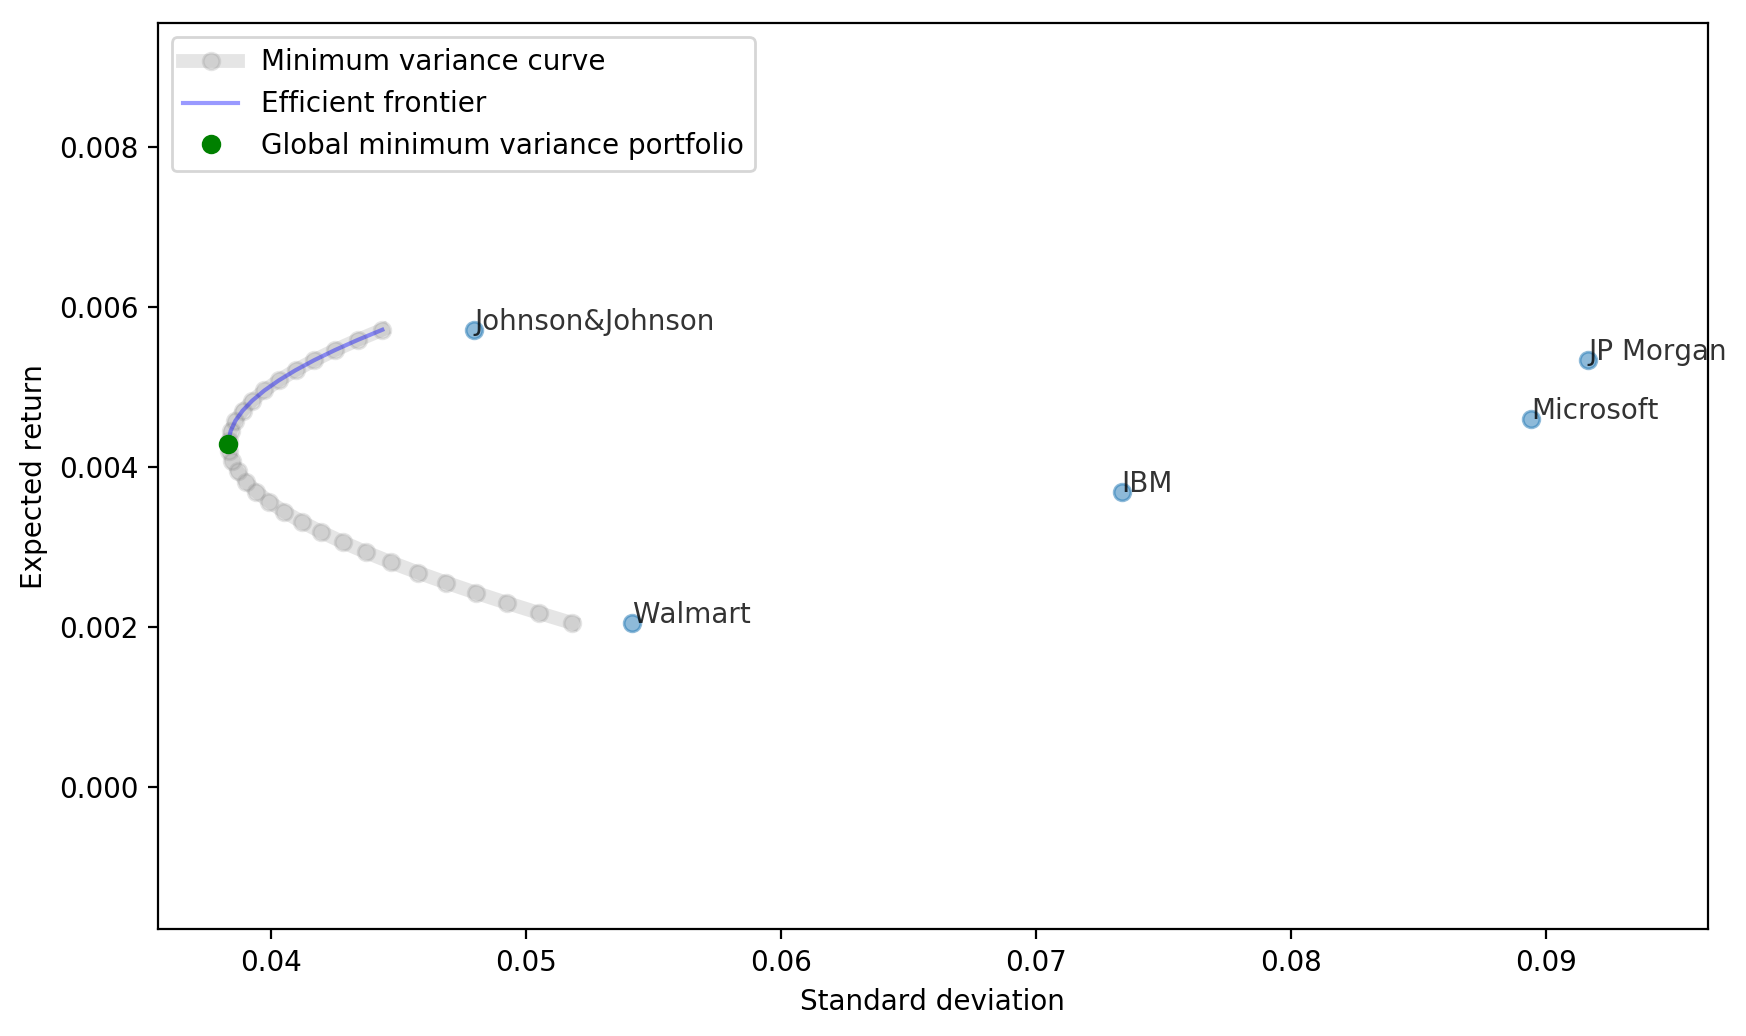

In [17]:
# plot of the minimum variance frontier and efficient frontier

plot_efficient_frontier(returns, stocks, portfolio_returns, portfolio_stds, 
                        global_minimum_variance_portfolio_return,
                        global_minimum_variance_portfolio_std, 
                        'Minimum variance curve', 'Global minimum variance portfolio')
    

#### On the MVF, efficient portfolios are the ones which have a higher expected returns than the global minimal variance portfolio. On this plot, it corresponds to portfolios on the blue line.

### question 2.F

In [18]:
#Computation to find the weights of tangency portfolio
R = 0.005 / 12

weight_T = np.dot(cov_matrix_inv , (expected_returns - np.dot(R, ones)))/ (B-A*R) #equation 66 in lecture notes

portfolio_variance_T = (C - 2*R*B + A*R**2) / ((B - A*R)**2) #equation 68 in lecture notes
portfolio_return_T = (C - R*B) / (B - A*R) #equation 67 in lecture notes
print('weights tangency portfolio: ', weight_T)
print('annualized vol tangency portfolio: ', np.sqrt(portfolio_variance_T * np.sqrt(12))) # multiply the portfolio standard deviation by the square root of 12 to annualize
print('annualized return tangency portfolio: ', portfolio_return_T * 12) #multiply portfolio return by 12 to annualize

weights tangency portfolio:  [ 0.09548331  0.0008555   0.84404136 -0.07791812  0.13753795]
annualized vol tangency portfolio:  0.0844501502923308
annualized return tangency portfolio:  0.07009440605853424


In [19]:
#verify that the sum of weight is equal to 1 because no risk less asset in the tangency portfolio.

sum(weight_T)

1.0

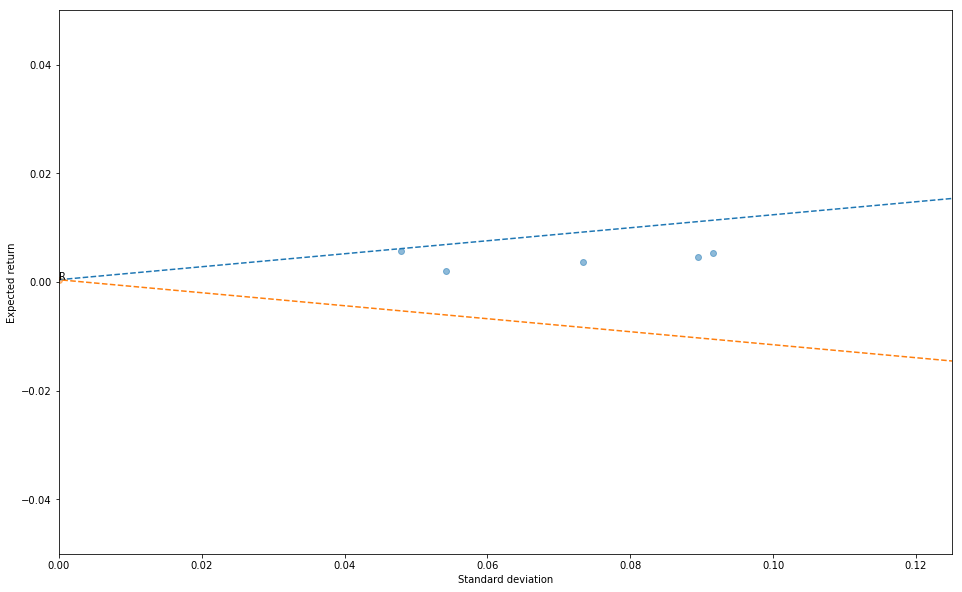

In [20]:
plt.rcParams["figure.figsize"] = (16,10)


# formulas from the lecture notes to plot the pair of rays in the mean, standard deviation space.

intercept = R 
slope_plus = np.sqrt(C-2*R*B + A*R**2)
slope_minus = - np.sqrt(C -2*R*B + A*R**2)

#function to plot the two lines with intercept R
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    
abline(slope_plus, intercept)
abline(slope_minus, intercept)

# Compute standard deviations and expected return of stocks to plot it
stock_stds = returns[stocks].std()
stock_returns = returns[stocks].mean()



# Visualize stocks
plt.scatter(stock_stds, stock_returns, alpha=0.5)
plt.scatter(0, R, alpha = 0.5)


plt.gca().annotate('R', (0, R))

plt.xlabel('Standard deviation')
plt.ylabel('Expected return') 

plt.xlim((0.0, 0.125))
plt.ylim((-0.05, 0.05));



In the standard deviation space, the minimum variance set is a pair of rays. The efficient frontier is represented here by the blue line with intercept R = 0.005 / 12  ( where the blue line and orange line meet ) and slope ( C-2*R*B + A*R^2 ) ^0.5 . the dots represents each stocks. We can see that they are all below the efficient frontier.

### EX2 G

In [21]:
#create variable dataframe backtest between 2016-1-1 and 2020-12-1 and transform it in a numpy matrix to perform 
#computations more easily.

backtest_ = pd.read_csv('Data Q1&2.csv', parse_dates = ['Date'], index_col = 'Date')
backtest_ = backtest_[(backtest_.index >= '2016-1-1') & (backtest_.index <= '2020-12-1')]

backtest = backtest_.to_numpy()


In [22]:
#rebalancing

def rebalance_portfolio(backtest, vector_weights):

    number_shares = np.zeros_like(backtest) # create an array of 0's to initialize
    initial_investment = 1 
    target_weight = np.array(vector_weights) # create an arraw of target weights

    for obs in range(backtest.shape[0]): #loop over all observations since we rebalance each period
        if obs == 0:
            
            # compute number of shares for each stock in the first period by multiplying the initial investment of 1
            # by the target weight and then divide by the stock's correponding price
            number_shares[obs] = initial_investment * target_weight / backtest[obs]
            
        else:
            # compute portfolio value for each period by multiplying number of shares of the precedent period 
            # times the stock price in this period and sum it all to get portfolio value
            portfolio_value = (number_shares[obs-1] * backtest[obs]).sum()
            
            # recompute the number of shares after change in portfolio value using again the target weight.
            number_shares[obs] = portfolio_value * target_weight / backtest[obs]

    
    portfolio_value = [sum(i * j) for i, j in zip(number_shares, backtest)]
    
    
    return portfolio_value


portfolio_value_tangency_weight = rebalance_portfolio(backtest, [0.09548331,0.0008555 ,0.84404136, -0.07791812 , 0.13753795])

portfolio_value_equal_weight = rebalance_portfolio(backtest, [0.2, 0.2, 0.2, 0.2, 0.2])

# Put the values into the pandas dataframe for further usage

portfolio_value_tangency_weight = pd.DataFrame(portfolio_value_tangency_weight, index = backtest_.index, columns = ['Portfolio value'])

portfolio_value_equal_weight = pd.DataFrame(portfolio_value_equal_weight, index = backtest_.index, columns = ['Portfolio value'])


In [23]:
#returns and cumulative returns of both portfolios

returns_balanced_tangency_portfolio = get_monthly_simple_return(portfolio_value_tangency_weight)
cum_returns_balanced_tangency = get_cumul_return(returns_balanced_tangency_portfolio)

returns_balanced_equal_portfolio = get_monthly_simple_return(portfolio_value_equal_weight)
cum_returns_balanced_equal = get_cumul_return(returns_balanced_equal_portfolio)

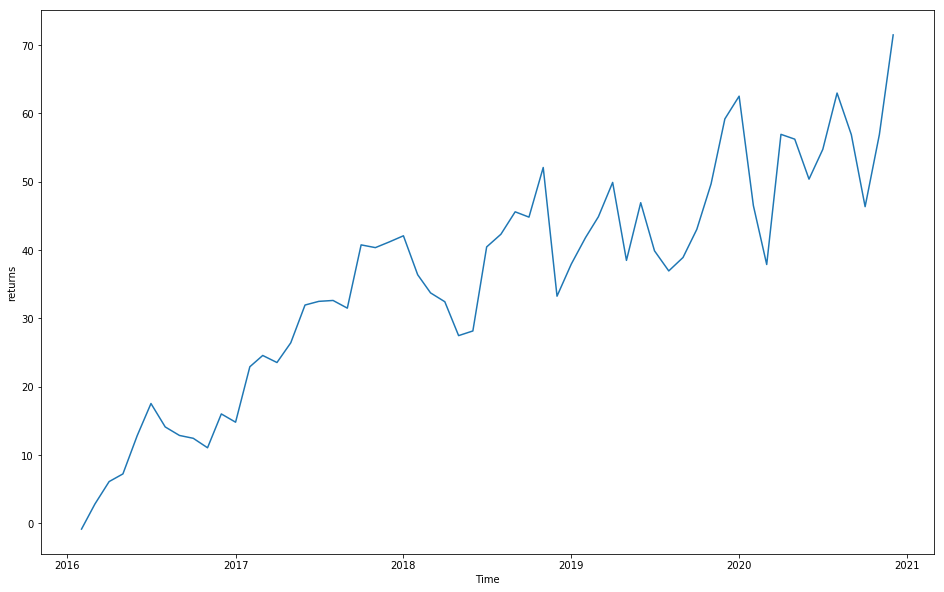

In [24]:
#plot of the cumulative returns tangency portfolio rebalanced

plt.plot(backtest_.index[1:], cum_returns_balanced_tangency)
plt.xlabel('Time')
plt.ylabel('returns')
plt.show()

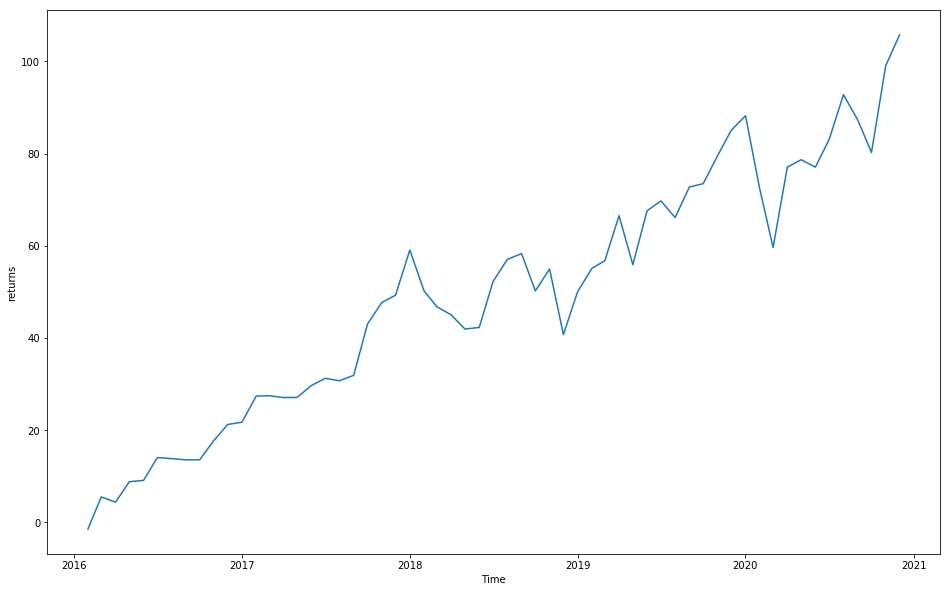

In [25]:
#plot of the cumulative returns of the equal weight portfolio rebalanced

plt.plot(backtest_.index[1:], cum_returns_balanced_equal)
plt.xlabel('Time')
plt.ylabel('returns')
plt.show()

In [26]:
# compute annualized arithmetic returns using function define before

tangency_ari_annu = arithmetic_return_annualized(returns_balanced_tangency_portfolio['Portfolio value'], 60, 12)
print(tangency_ari_annu)

equal_ari_annu = arithmetic_return_annualized(returns_balanced_equal_portfolio['Portfolio value'], 60, 12)
print(equal_ari_annu)

0.12126184732464071
0.1556742767325333


In [27]:
# annualized volatility using function define before

tangency_vol_annu = annualized_vol(returns_balanced_tangency_portfolio['Portfolio value'], 12)
print(tangency_vol_annu)

equal_vol_annu = annualized_vol(returns_balanced_equal_portfolio['Portfolio value'], 12)
print(equal_vol_annu)

0.16334935066469092
0.14782752798179696


In [28]:
sharpe_tangency = ((sum(returns_balanced_tangency_portfolio['Portfolio value'] - 0.005/12) / 60 ) / 
                   (returns_balanced_tangency_portfolio['Portfolio value'] - 0.005/12).std())

sr_annualized_tangency = sharpe_tangency * np.sqrt(12)
print(sr_annualized_tangency)


sharpe_equal = ((sum(returns_balanced_equal_portfolio['Portfolio value'] - 0.005/12) / 60 ) / 
                   (returns_balanced_equal_portfolio['Portfolio value'] - 0.005/12).std())

sr_annualized_equal = sharpe_equal * np.sqrt(12)
print(sr_annualized_equal)


0.7122475858309167
1.0198209502930373


In [29]:
#annualized geometric returns using function define before

tangency_geo_annu = geometric_mean_annu(returns_balanced_tangency_portfolio['Portfolio value'], 60, 12)
print(tangency_geo_annu)

equal_geo_annu = geometric_mean_annu(returns_balanced_equal_portfolio['Portfolio value'], 60, 12)
print(equal_geo_annu)

0.11390552239693807
0.15520582044965203


We were not exactly expecting this result, since we can see on the plots that the cumulative returns for the equally weighted portfolio are approximately 100% compared to 70% for the tangency portfolio. Moreover, the cumulative returns of the tangency portfolio looks more volatile than the equally weighted portfolio. This is confirmed by our result for the annualized return (higher for the equally weighted portfolio) and annualized volatility (lower for the equally weighted portfolio). One explanation would be that even though the tangency weights are computed optimally to maximimze result at the beginning, by rebalancing we looks the characteristics of the tangency portfolio and it then starts to perform less good. In addtion, we can see on the plots that the cumulative returns are higher at the beginning for the tangency portfolio rebalanced letting us suppose that if not rebalanced, or rebalanced less frequently, the results would have been better for the cumulative returns of the tangency portfolio.

## EX3

In [30]:
#create dataframe for each series

esg_scores = pd.read_csv('SMI_esg.csv', index_col = 'NAME')
smi_index = pd.read_csv('SMI_index.csv', index_col = 'date')
smi_prices = pd.read_csv('SMI_prices.csv', index_col = 'date')
annualized_rf = pd.read_csv('rf_CH.csv', index_col = 'date')


In [31]:
# here we divide each value in the serie by 12 (number of periods per year) and 
#compute the mean to get the scalar R. 

R = ((annualized_rf / 12).mean()).values 
print(R)

[-0.00024424]


In [32]:
#list of stocks 

stocks = smi_prices.columns

In [33]:
#compute returns for each stock in smi_prices file

returns = get_monthly_simple_return(smi_prices)

In [34]:
#compute expected returns for each stock and covariance matrix 

expected_returns = returns.mean()
cov_matrix = returns.cov()

In [35]:
#Computations of the values A,B and C as well as the vector of ones as before but with new data.

N = len(cov_matrix)

ones = np.ones(N)
cov_matrix_inv = np.linalg.inv(cov_matrix)
A = np.dot(ones.T, np.dot(cov_matrix_inv, ones))
B = np.dot(expected_returns.T, np.dot(cov_matrix_inv, ones))
C = np.dot(expected_returns.T, np.dot(cov_matrix_inv, expected_returns))

### EX 3 G

In [36]:
#tangency portfolio

#risk free rate computed above
R = -0.00024424 

#tangency weight using same formulas as before
weight_T = np.dot(cov_matrix_inv , (expected_returns - np.dot(R, ones)))/ (B-A*R)

#portfolio variance and portfolio returns using formulas as before 
portfolio_variance_T = (C - 2*R*B + A*R**2) / ((B - A*R)**2)
portfolio_return_T = (C - R*B) / (B - A*R)

# concatenate stock name and its weight in the tangency portfolio
for stock, w in zip(stocks, weight_T):
    print(f'tangency weight for {stock} : {w}')
    

# annualized portfolio volatility and portfolio return
annualized_vol_T = np.sqrt(portfolio_variance_T) * np.sqrt(12)
annualized_return_T = portfolio_return_T  * 12

print('annualized vol tangency portfolio: ', annualized_vol_T)
print('annualized return tangency portfolio: ', annualized_return_T) 

tangency weight for SGS 'N' : -0.19776353466496624
tangency weight for SWISSCOM 'R' : 0.013954173696071897
tangency weight for GIVAUDAN 'N' : 0.5300006196675676
tangency weight for ZURICH INSURANCE GROUP : 0.5014844907900913
tangency weight for NOVARTIS 'R' : -0.2998062382800317
tangency weight for ROCHE HOLDING : -0.017981377267036924
tangency weight for CREDIT SUISSE GROUP : -0.19750364561943448
tangency weight for HOLCIM : -0.3475994537090968
tangency weight for ABB LTD N : -0.16809377262323782
tangency weight for LONZA GROUP : 0.09346411395043305
tangency weight for SWISS LIFE HOLDING : 0.6323064567093443
tangency weight for PARTNERS GROUP HOLDING : 0.2764085278703366
tangency weight for LOGITECH 'R' : 0.2514290465266904
tangency weight for GEBERIT 'R' : -0.2751173015232779
tangency weight for NESTLE 'N' : 0.16748641197721179
tangency weight for SWISS RE : -0.4309033172265866
tangency weight for RICHEMONT N : -0.04312733235757638
tangency weight for UBS GROUP : -0.00132173908939217

In [37]:
#check that the tangency weights are equal to 1

sum(weight_T) 

0.9999999999999993

In [38]:
sharpe_ratio_annualized = ((portfolio_return_T - R) / np.sqrt(portfolio_variance_T)) * np.sqrt(12)
sharpe_ratio_annualized

3.0731153482324003

In [39]:
#compute ESG score of the tangency portfolio by multiplying the weight of a stock with its corresponding esg score

esg_score_T = weight_T.dot(esg_scores)
esg_score_T

array([58.38480187])

### EX 3 H

In [40]:
#create a array S containing the esg score 

S = np.array(esg_scores)

In [41]:
S = np.array([i for sublist in S.tolist() for i in sublist])

In [42]:
# create variable X, V, Z as we did o n paper for the previous questions.

D = np.dot(expected_returns.T, np.dot(cov_matrix_inv, S))
V = np.dot(ones.T, np.dot(cov_matrix_inv, S))
T = np.dot(S.T, np.dot(cov_matrix_inv, S))

s_star = (D - V * R ) / (B - A*R) # compuations of s_star follwing the formula derived in one of the precedent question
s_star

58.384801873014965

The value of s when lambda is equal to 0, is equal to to the esg score of the tangency portfolio, which is not surprising since in both cases we had to solve an unconstrained problem. Below s_star, investors are unconstrained and this value is then the limit.

### EX 3 i

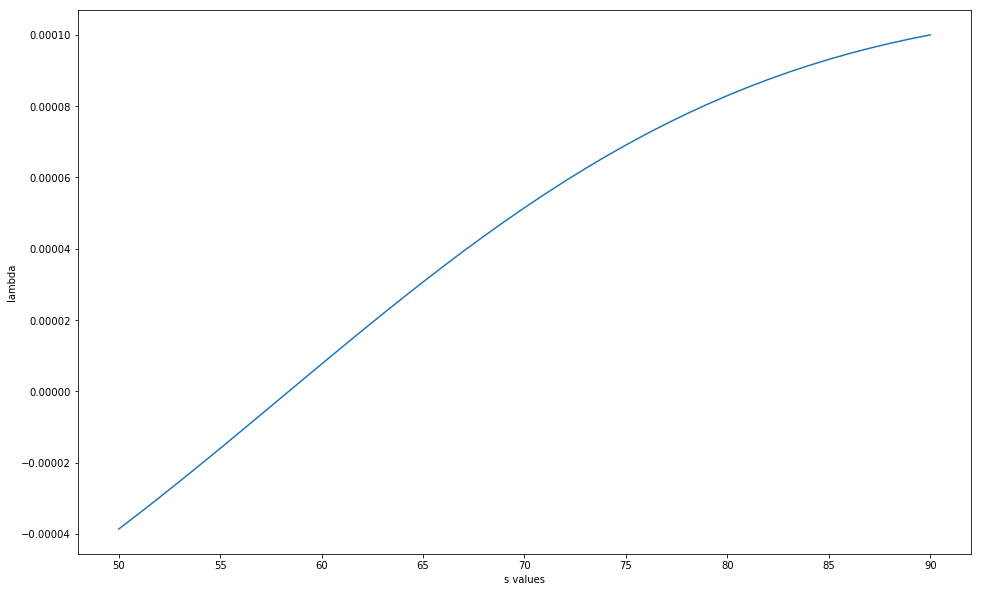

In [43]:
# here we computed lambda as formulated in the assignment.

def compute_lambda(s):
    S_s1 = S - s * ones
    mu_rf1 = expected_returns - R * ones
    num = np.dot(S_s1, np.dot(cov_matrix_inv, mu_rf1))
    den = np.dot(S_s1, np.dot(cov_matrix_inv, S_s1))
    
    return - num/den

lambda_ = []


#loop over the range of value for s to get a line
for i in range(50,90+1):
    lambda_.append(compute_lambda(i))


# plot 
plt.plot([i for i in range(50, 91)], lambda_)
plt.xlabel('s values')
plt.ylabel('lambda')
plt.show()



s values and lambda are positively correlated, as s increases, lambda increases too and inversely. if lambda is equal to 0 we are back to an unconstrained problem so lambda represents the effects level of a sustainability constraint on an unconstrained problem. 

### EX 3 J

In [44]:
# tangency portfolio constrained 

s_values = [i for i in range(59,91)]

WTP_constrained = []
portfolio_return = []
portfolio_variance =[]

for i, j in zip(s_values, lambda_):
    W = (1 / ((B-A*R) + (j*(V-i*A)))) * np.dot(cov_matrix_inv , 
                                                ((expected_returns - np.dot(R, ones)) + j*(S-np.dot(i, ones))))
    WTP_constrained.append(W)
    
#WTP_constrained 

# 1. need to compute portfolio variance and portfolio return of constrained problem

    #portfolio_return.append((C - B*R + j*(D-i*B)) / B - A*R + j*(V-i*A)) 

    #portfolio_variance.append((C - 2*B*R + j*(2*D - 2*V*R - 2*D*i +j*T - B*i) + A*R**2 + A*i*R + A*R*i**2 - B*i) / (B - A*R + j*(V-i*A))**2)


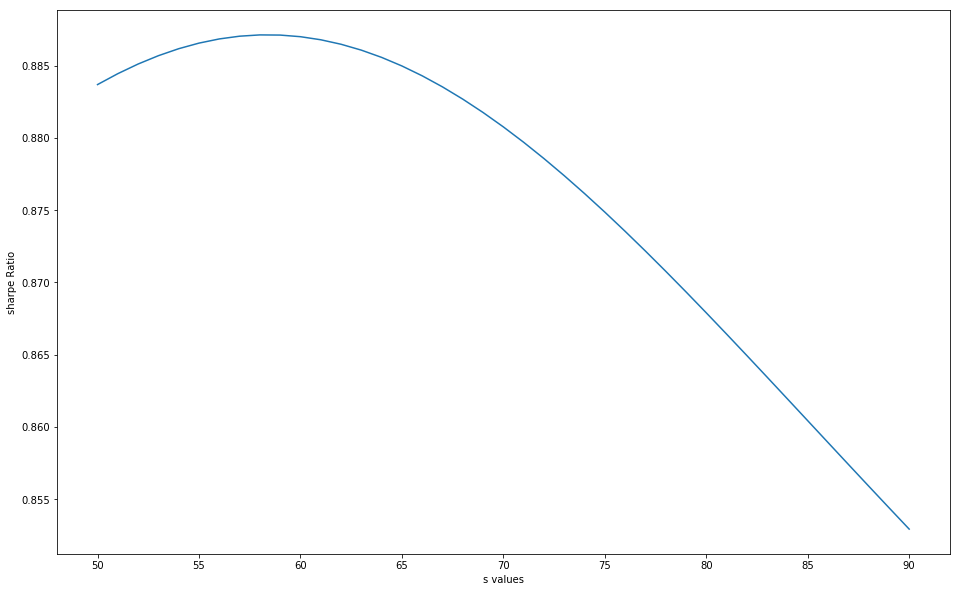

In [45]:
s_values = [i for i in range(50,91)]

SharpR = []



for i, j in zip(s_values, lambda_):
    S_s1 = S - i * ones
    mu_rf1 = expected_returns - R * ones
    I = mu_rf1+(j*S_s1)
    II = np.dot(I, np.dot(cov_matrix_inv, mu_rf1)) 
    W = II**(1/2)
    
    
    SharpR.append(W)

plt.plot([i for i in range(50, 91)], SharpR)
plt.xlabel('s values')
plt.ylabel('sharpe Ratio')
plt.show()

In [46]:
max(SharpR) * np.sqrt(12)

3.0730894977991228

As explained in the preamble of the question, sustainable investors should obtain addtional utility from a sustainable investment but it also means that they should be willing to accept lower returns or higher risk which in both cases will reduce the sharpe ratio. So they should expect lower sharpe ratios. This is coherent with a maximization problem under constraints since the feasible regions of solutions is smaller.

We did not manage to compute the portfolio return and variance of the constrained problem. Above you will find the plot between the sharpe ratio and different values for s.

## EX 4 

In [47]:
#create dataframe for each series

esg_scores = pd.read_csv('SMI_esg.csv', index_col = 'NAME')
smi_index = pd.read_csv('SMI_index.csv', index_col = 'date')
smi_prices = pd.read_csv('SMI_prices.csv', index_col = 'date')
annualized_rf = pd.read_csv('rf_CH.csv', index_col = 'date')


In [48]:
return_index = get_monthly_simple_return(smi_index)
return_index

,SMI
date,
1/29/2016,-0.056507
2/29/2016,-0.057234
3/31/2016,-0.004557
4/29/2016,0.019590
5/31/2016,0.032103
...,...
8/31/2021,0.024288
9/30/2021,-0.061933
10/29/2021,0.040002


In [49]:
expected_returns = return_index.mean()
cov_matrix = return_index.cov()

In [50]:
N = len(cov_matrix) 
ones = np.ones(N)
cov_matrix_inv = np.linalg.inv(cov_matrix)
A = np.dot(ones.T, np.dot(cov_matrix_inv, ones)) 
B = np.dot(expected_returns.T, np.dot(cov_matrix_inv, ones)) 
C = np.dot(expected_returns.T, np.dot(cov_matrix_inv, expected_returns)) 

In [51]:
expected_returns

SMI    0.005817
dtype: float64